## TAREA FÍSICA EXPERIMENTAL III, ELECTROCARDIOGRAMA.

A continuación, se adjuntan 4 señales ECG (electrocardiogramas) correspondientes a dos señales sintéticas: senal_ECG_1, senal_ECG2; y dos señales reales: senal_real_ECG_1 y senal_real_ECG_2.

**1. Grafique las señales sintéticas y sus respectivas transformadas de Fourier. Tenga en cuenta que las señales ECG se simularon para un tiempo total de 10 segundos.**

In [13]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import cmath as cm
import IPython.display as ipd


%matplotlib inline 
plt.rcParams['figure.figsize'] = 50, 50 # para modificar el tamaño de la figura

font = {'weight' :  'bold', 
        'size'   : 44}

matplotlib.rc('font', **font)


Número de datos = 106000
Duración = 10.000000 s
Muestreo temporal = 0.000094 s
Número de datos = 66000
Duración = 10.000000 s
Muestreo temporal = 0.000152 s


Text(0.5, 0, 'Frecuencia (Hz)')

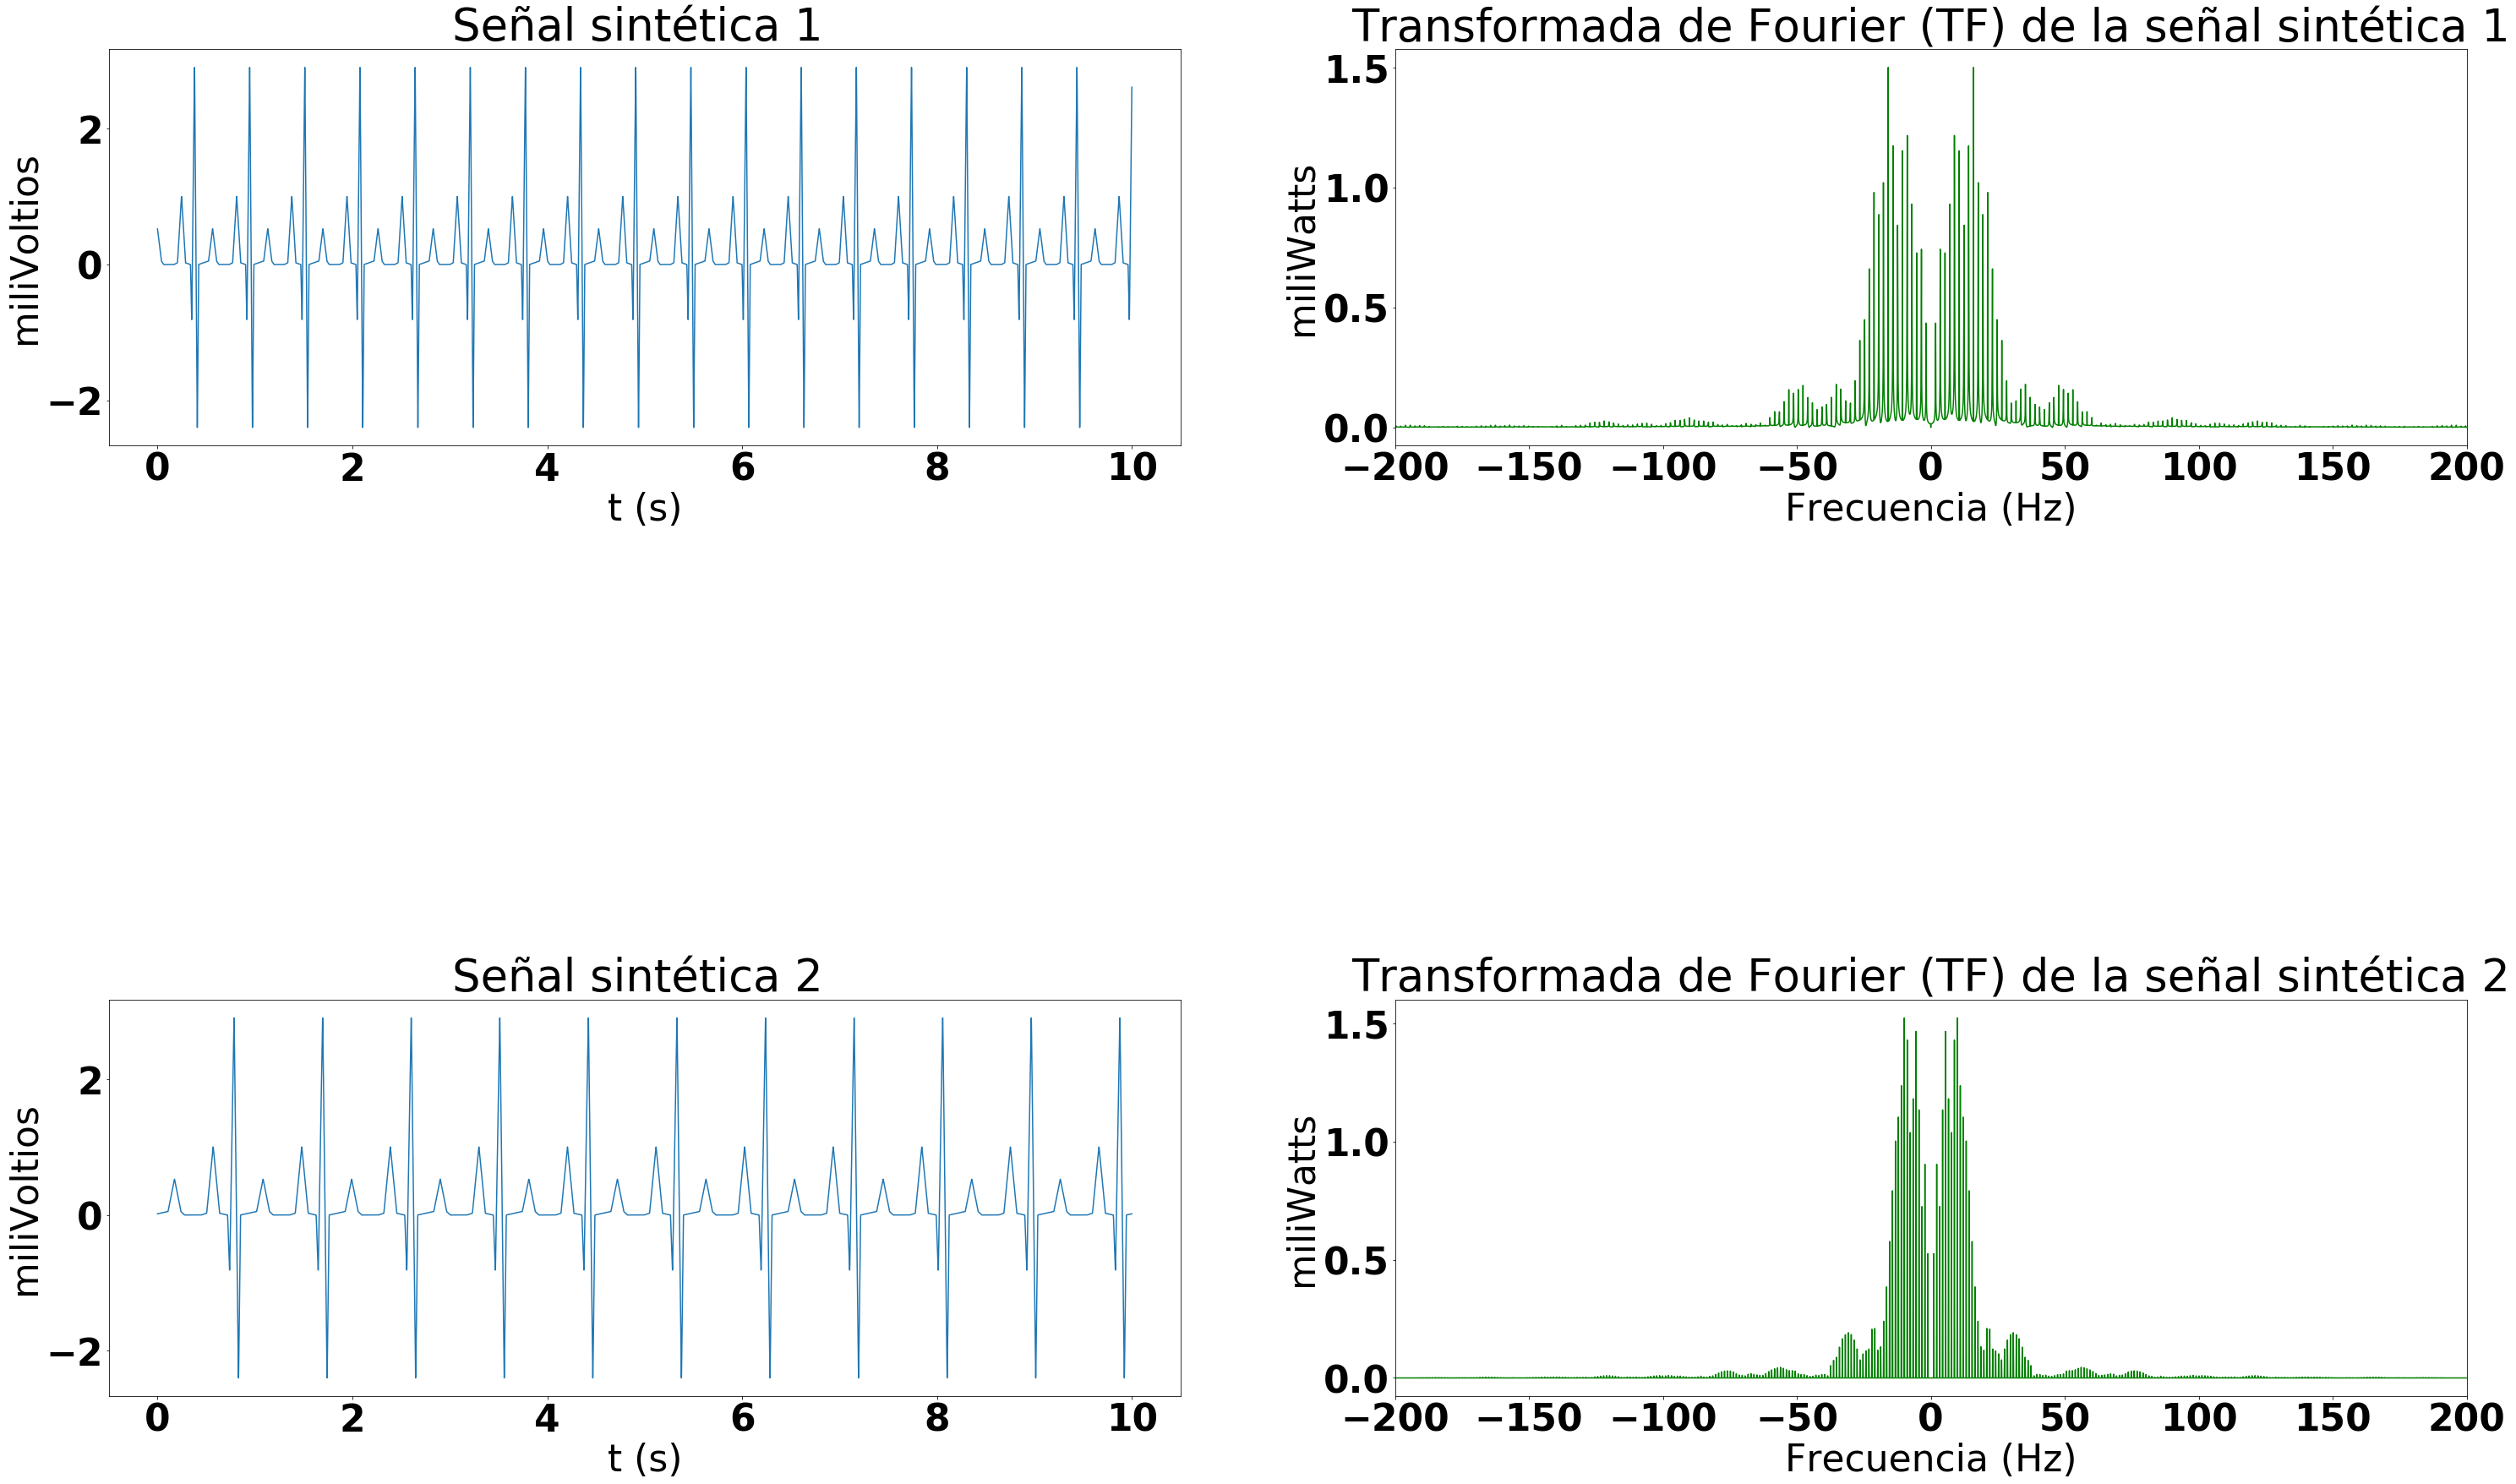

In [14]:
data1 = np.loadtxt('senal_ECG_1.txt')
tamdata1 = data1.size
duration1 = 10
dt1 = duration1/tamdata1
t1 = np.arange(0,duration1,dt1)


print('Número de datos = %.f' % tamdata1)
print('Duración = %f s'  % duration1)
print('Muestreo temporal = %f s' % dt1)

plt.subplot(5,2,1)
plt.plot(t1,data1)
plt.title('Señal sintética 1 ')
plt.ylabel('miliVoltios')
plt.xlabel('t (s)')


#Transformada

dataft1 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data1)-np.mean(data1)))*dt1
freq1 = np.arange(-1/(2*dt1),1/(2*dt1),1/(dt1*t1.size))
#freq = freq[0:freq.size-1]


dataft_phase1 = np.zeros((dataft1.size))
for cont in range(0,dataft_phase1.size):
    dataft_phase1[cont] = cm.phase(dataft1[cont])

plt.subplot(5,2,2)
plt.plot(freq1,abs(dataft1),color='green')
plt.xlim(-200, 200)
plt.title('Transformada de Fourier (TF) de la señal sintética 1')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')



#Segunda señal sintética

data2 = np.loadtxt('senal_ECG_2.txt')
tamdata2 = data2.size
duration2 = 10
dt2 = duration2/tamdata2
t2 = np.arange(0,duration2,dt2)


print('Número de datos = %.f' % tamdata2)
print('Duración = %f s'  % duration2)
print('Muestreo temporal = %f s' % dt2)

plt.subplot(5,2,5)
plt.plot(t2,data2)
plt.title('Señal sintética 2 ')
plt.ylabel('miliVoltios')
plt.xlabel('t (s)')


#Transformada

dataft2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data2)-np.mean(data2)))*dt2
freq2 = np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*t2.size))
#freq = freq[0:freq.size-1]


dataft_phase2 = np.zeros((dataft2.size))
for cont in range(0,dataft_phase2.size):
    dataft_phase2[cont] = cm.phase(dataft2[cont])

plt.subplot(5,2,6)
plt.plot(freq2,abs(dataft2),color='green')
plt.xlim(-200, 200)
plt.title('Transformada de Fourier (TF) de la señal sintética 2')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')









**2. A partir de las gráficas de las señales y sus transformadas de Fourier identifique la frecuencia cardíaca de cada paciente (igual que con el piano, la frecuencia que buscamos es la fundamental, pero en este caso no podemos confundirla con la señal cercana a cero que para este ejemplo es ruido).**

Para la identificación de la frecuencia fundamental haremos zoom sobre el eje x positivo y observaremos el comportamiento cíclico. 

Empecemos con la señal sintética 1.

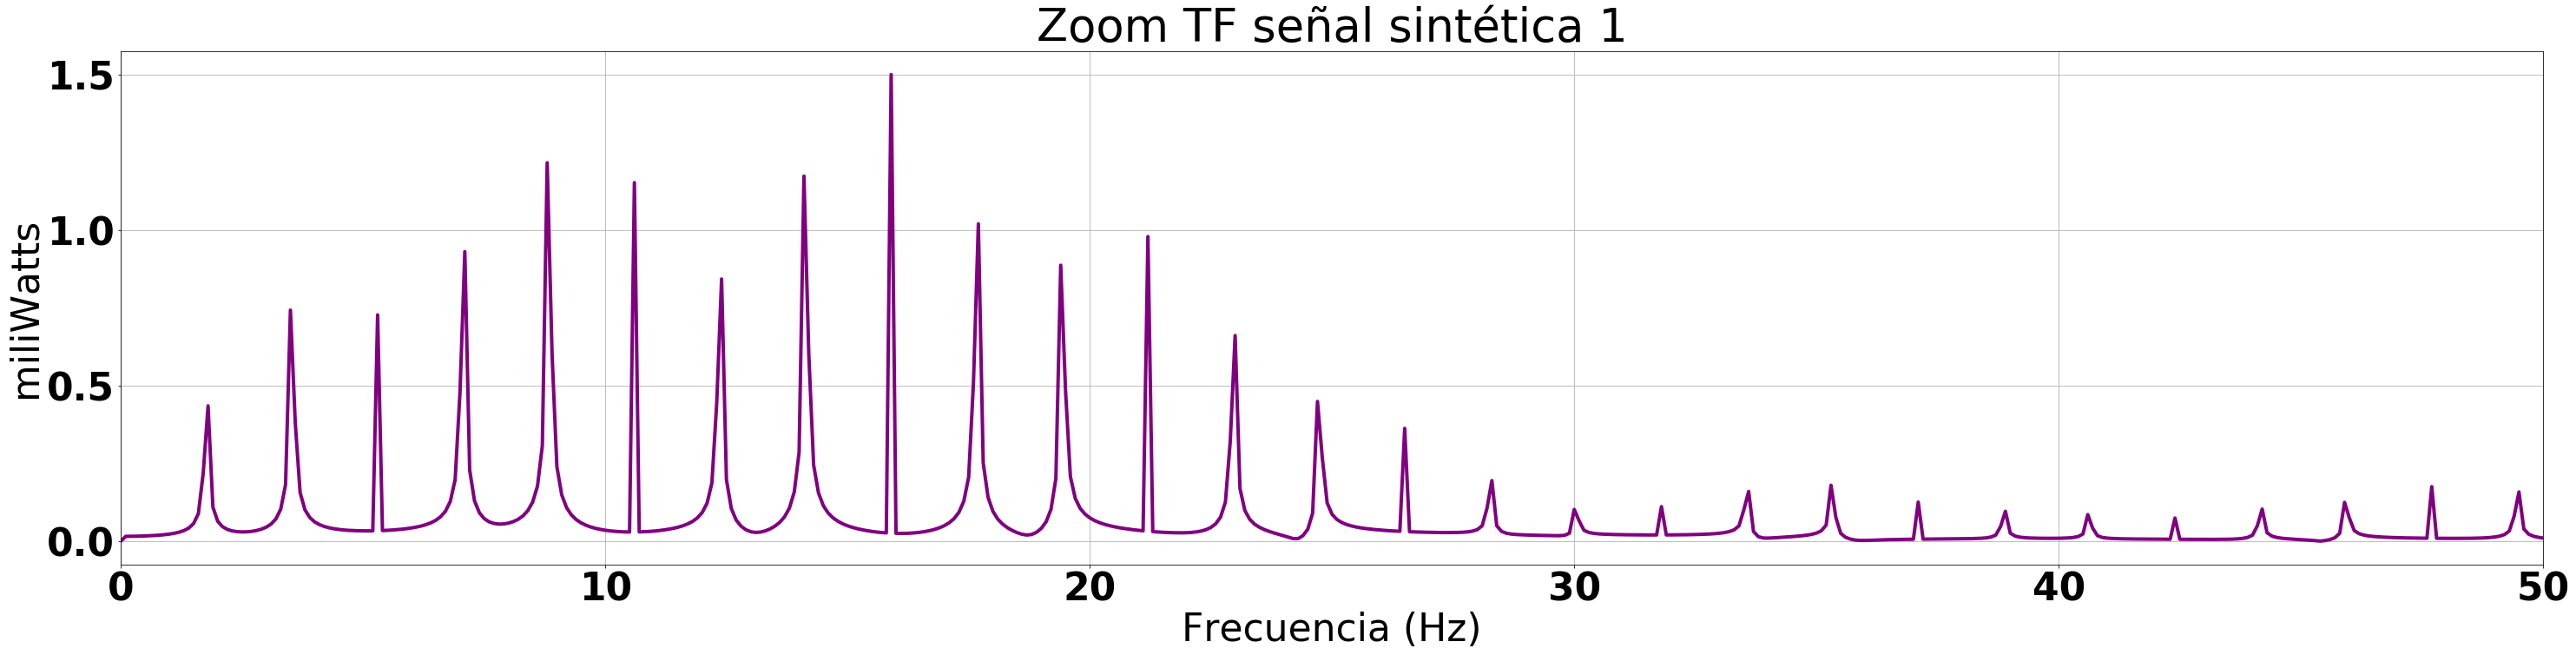

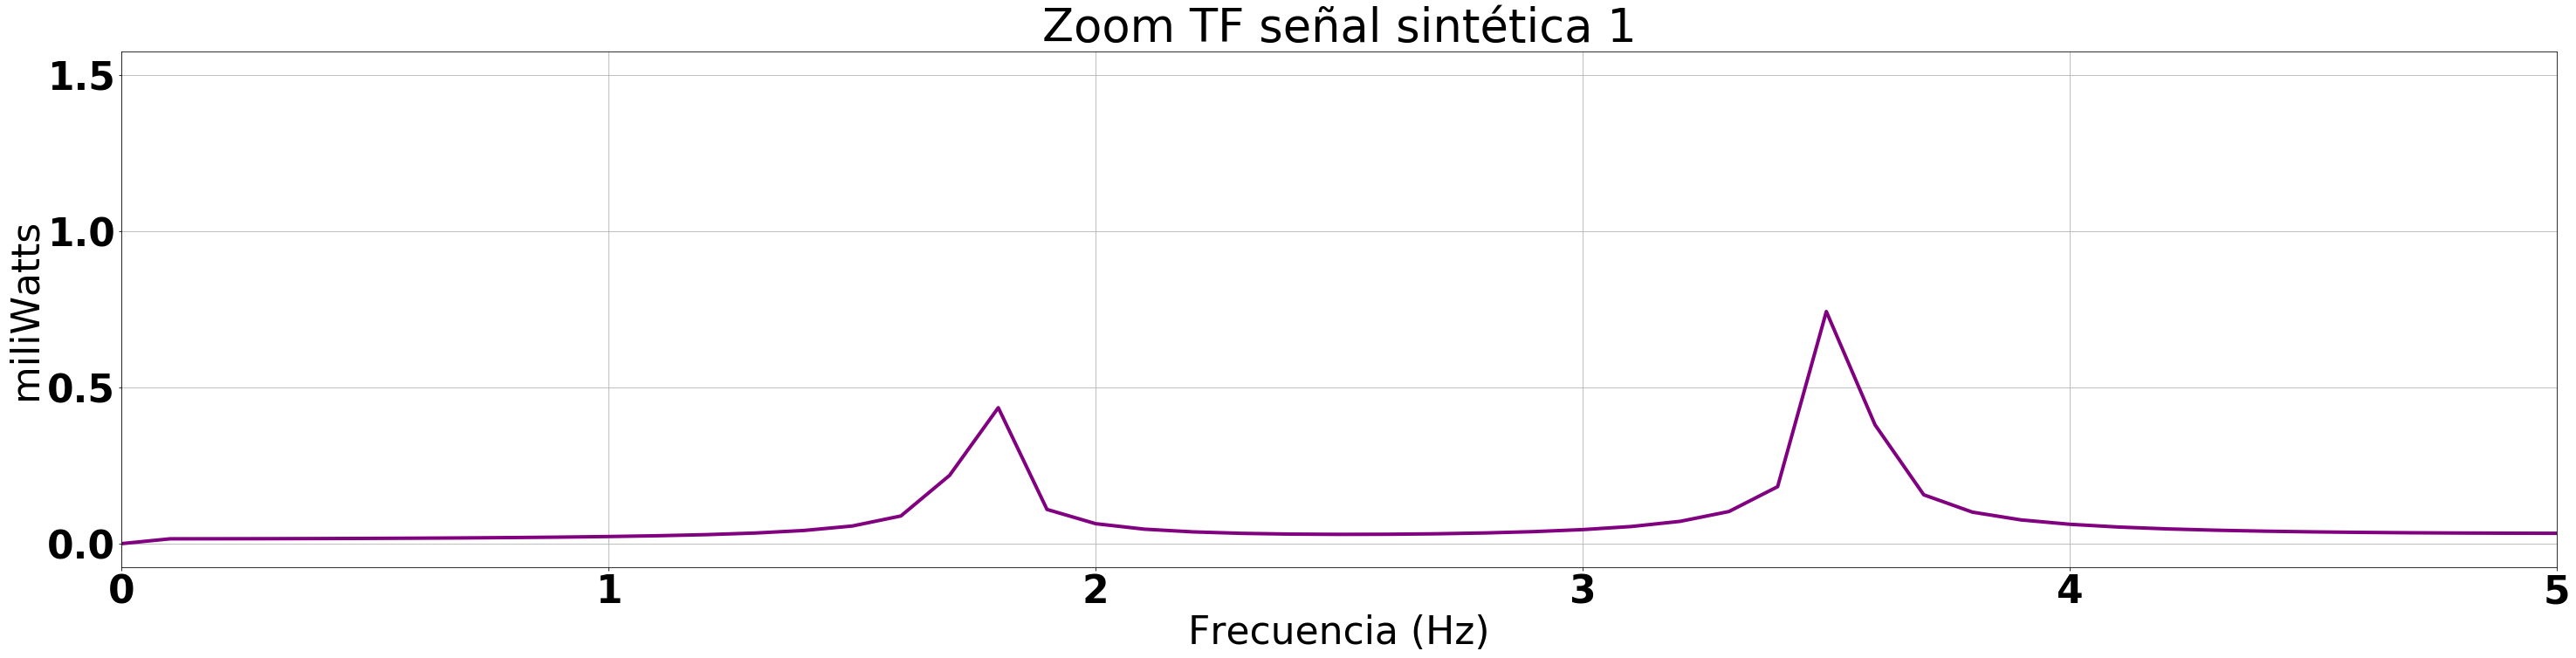

In [15]:
plt.subplot(4,1,3)
plt.plot(freq1,abs(dataft1),color='purple',linewidth=4)
plt.title('Zoom TF señal sintética 1')
plt.xlim(0, 50)
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()


plt.subplot(4,1,4)
plt.plot(freq1,abs(dataft1),color='purple',linewidth=4)
plt.xlim(0, 5)
plt.title('Zoom TF señal sintética 1')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()

Después de realizar las gráficas aumentadas podemos identificar una frecuencia de alrededor de **1.75 Hz** para la primera señal sintética. 

A continuación, veamos que sucede con la segunda señal sintética. 

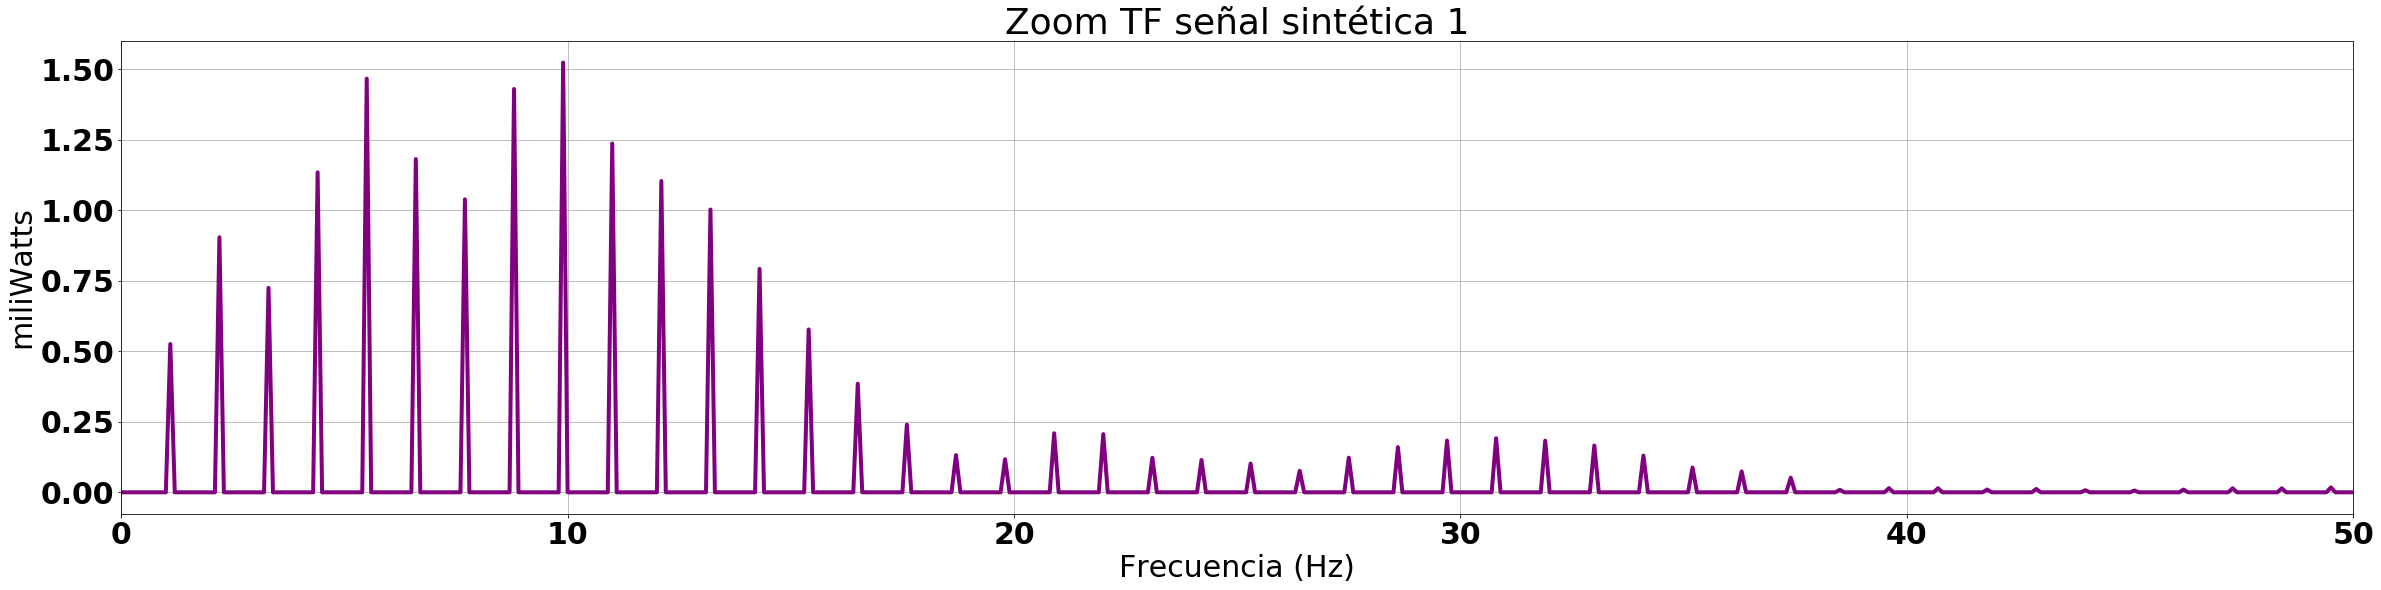

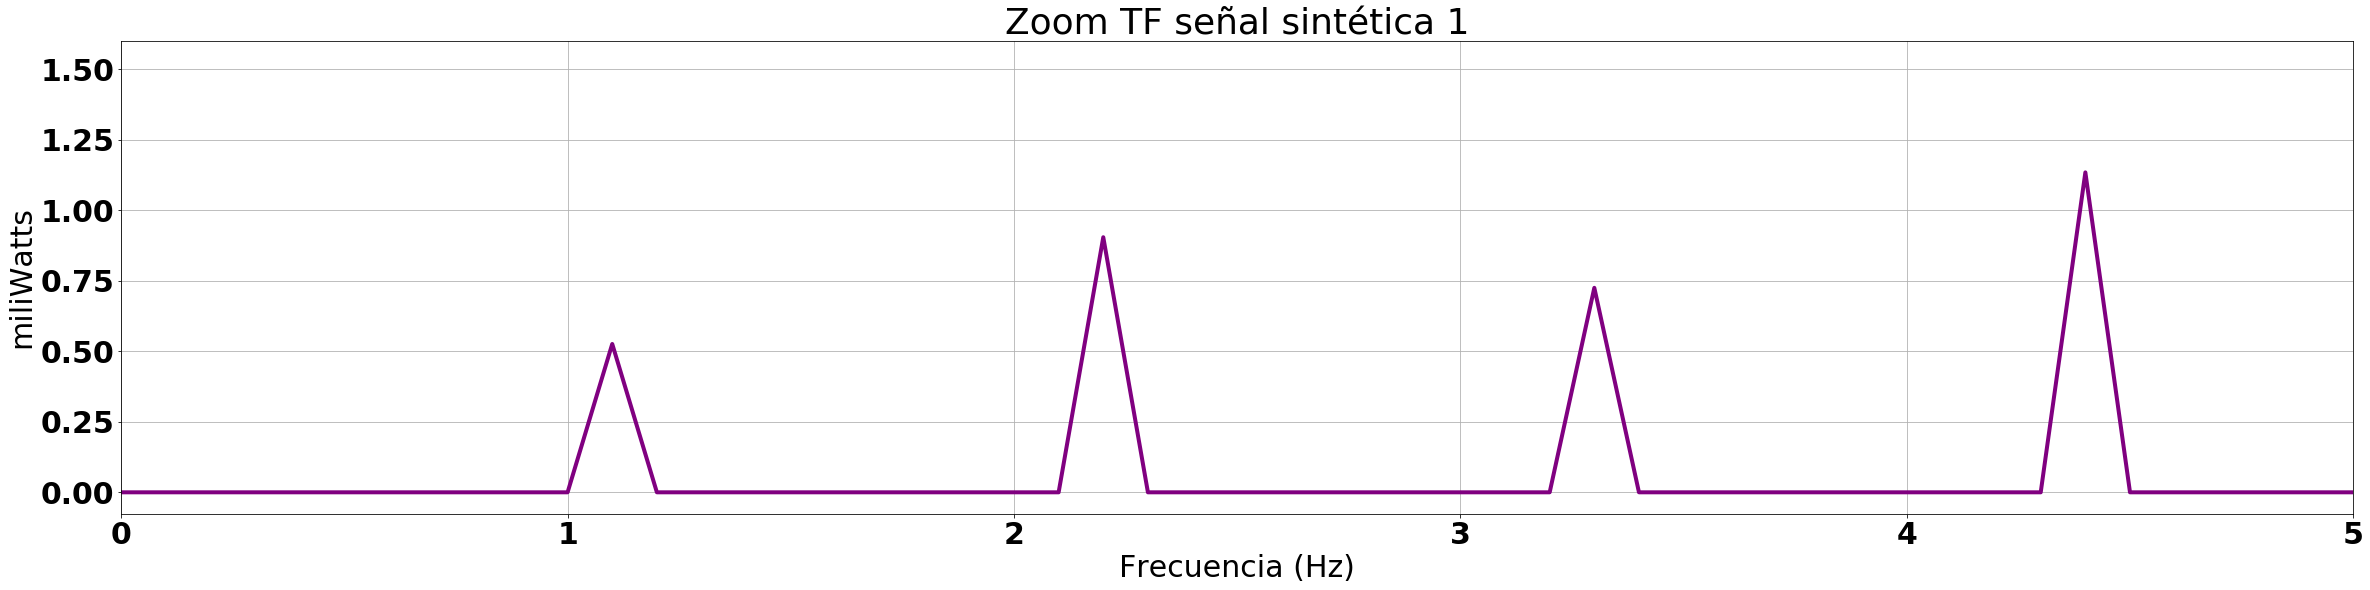

In [65]:
plt.subplot(4,1,3)
plt.plot(freq2,abs(dataft2),color='purple',linewidth=4)
plt.title('Zoom TF señal sintética 2')
plt.xlim(0, 50)
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()


plt.subplot(4,1,4)
plt.plot(freq2,abs(dataft2),color='purple',linewidth=4)
plt.xlim(0, 5)
plt.title('Zoom TF señal sintética 2')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()

Después de realizar las gráficas aumentadas podemos identificar una frecuencia de alrededor de **1.09 Hz** para la segunda señal sintética. 


**3. De acuerdo con sus respuestas, ¿los pacientes tienen un ritmo cardíaco normal o presentan patologías como taquicardia o bradicardia? Investigue.**

Para la señal sintética número uno, el paciente presentaría taquicardia auricular multifocal pues la frecuencia es de 105 pulsaciones por minuto y se encuentra en un rango entre 100 y 130 pulsaciones, según datos de la biblioteca nacional de medicina de los Estados Unidos de América. 

Para la señal sintética número dos, el paciente presenta una frecuencia cardiaca de 65.4 pulsaciones por minutoentre 60 y 80 latidos por minuto, la cual es normal para una persona adulta.

**4. Grafique las señales ECG reales y sus espectros de Fourier. Nota: las señales se midieron con un equipo cuya frecuencia de muestreo fue de 25 Hz. 
Note que la TF de senal_real_ECG_2 aparenta ser nula. Lo que pasa es que el valor promedio, o lo que es lo mismo, la señal de frecuencia cero tiene un valor muy grande (note que oscila alrededor de 4000). Esto es un bias y debemos eliminarlo para poder ver la señal. En la señal original averigüe el valor promedio y résteselo a todos los datos de la señal original. Vuelva a hacer la TF y mire la diferencia.**

Número de datos = 30720
Duración = 30.000000 s
Muestreo temporal = 0.000977 s
Número de datos = 30720
Duración = 30.000000 s
Muestreo temporal = 0.000977 s


Text(0, 0.5, 'miliWatts')

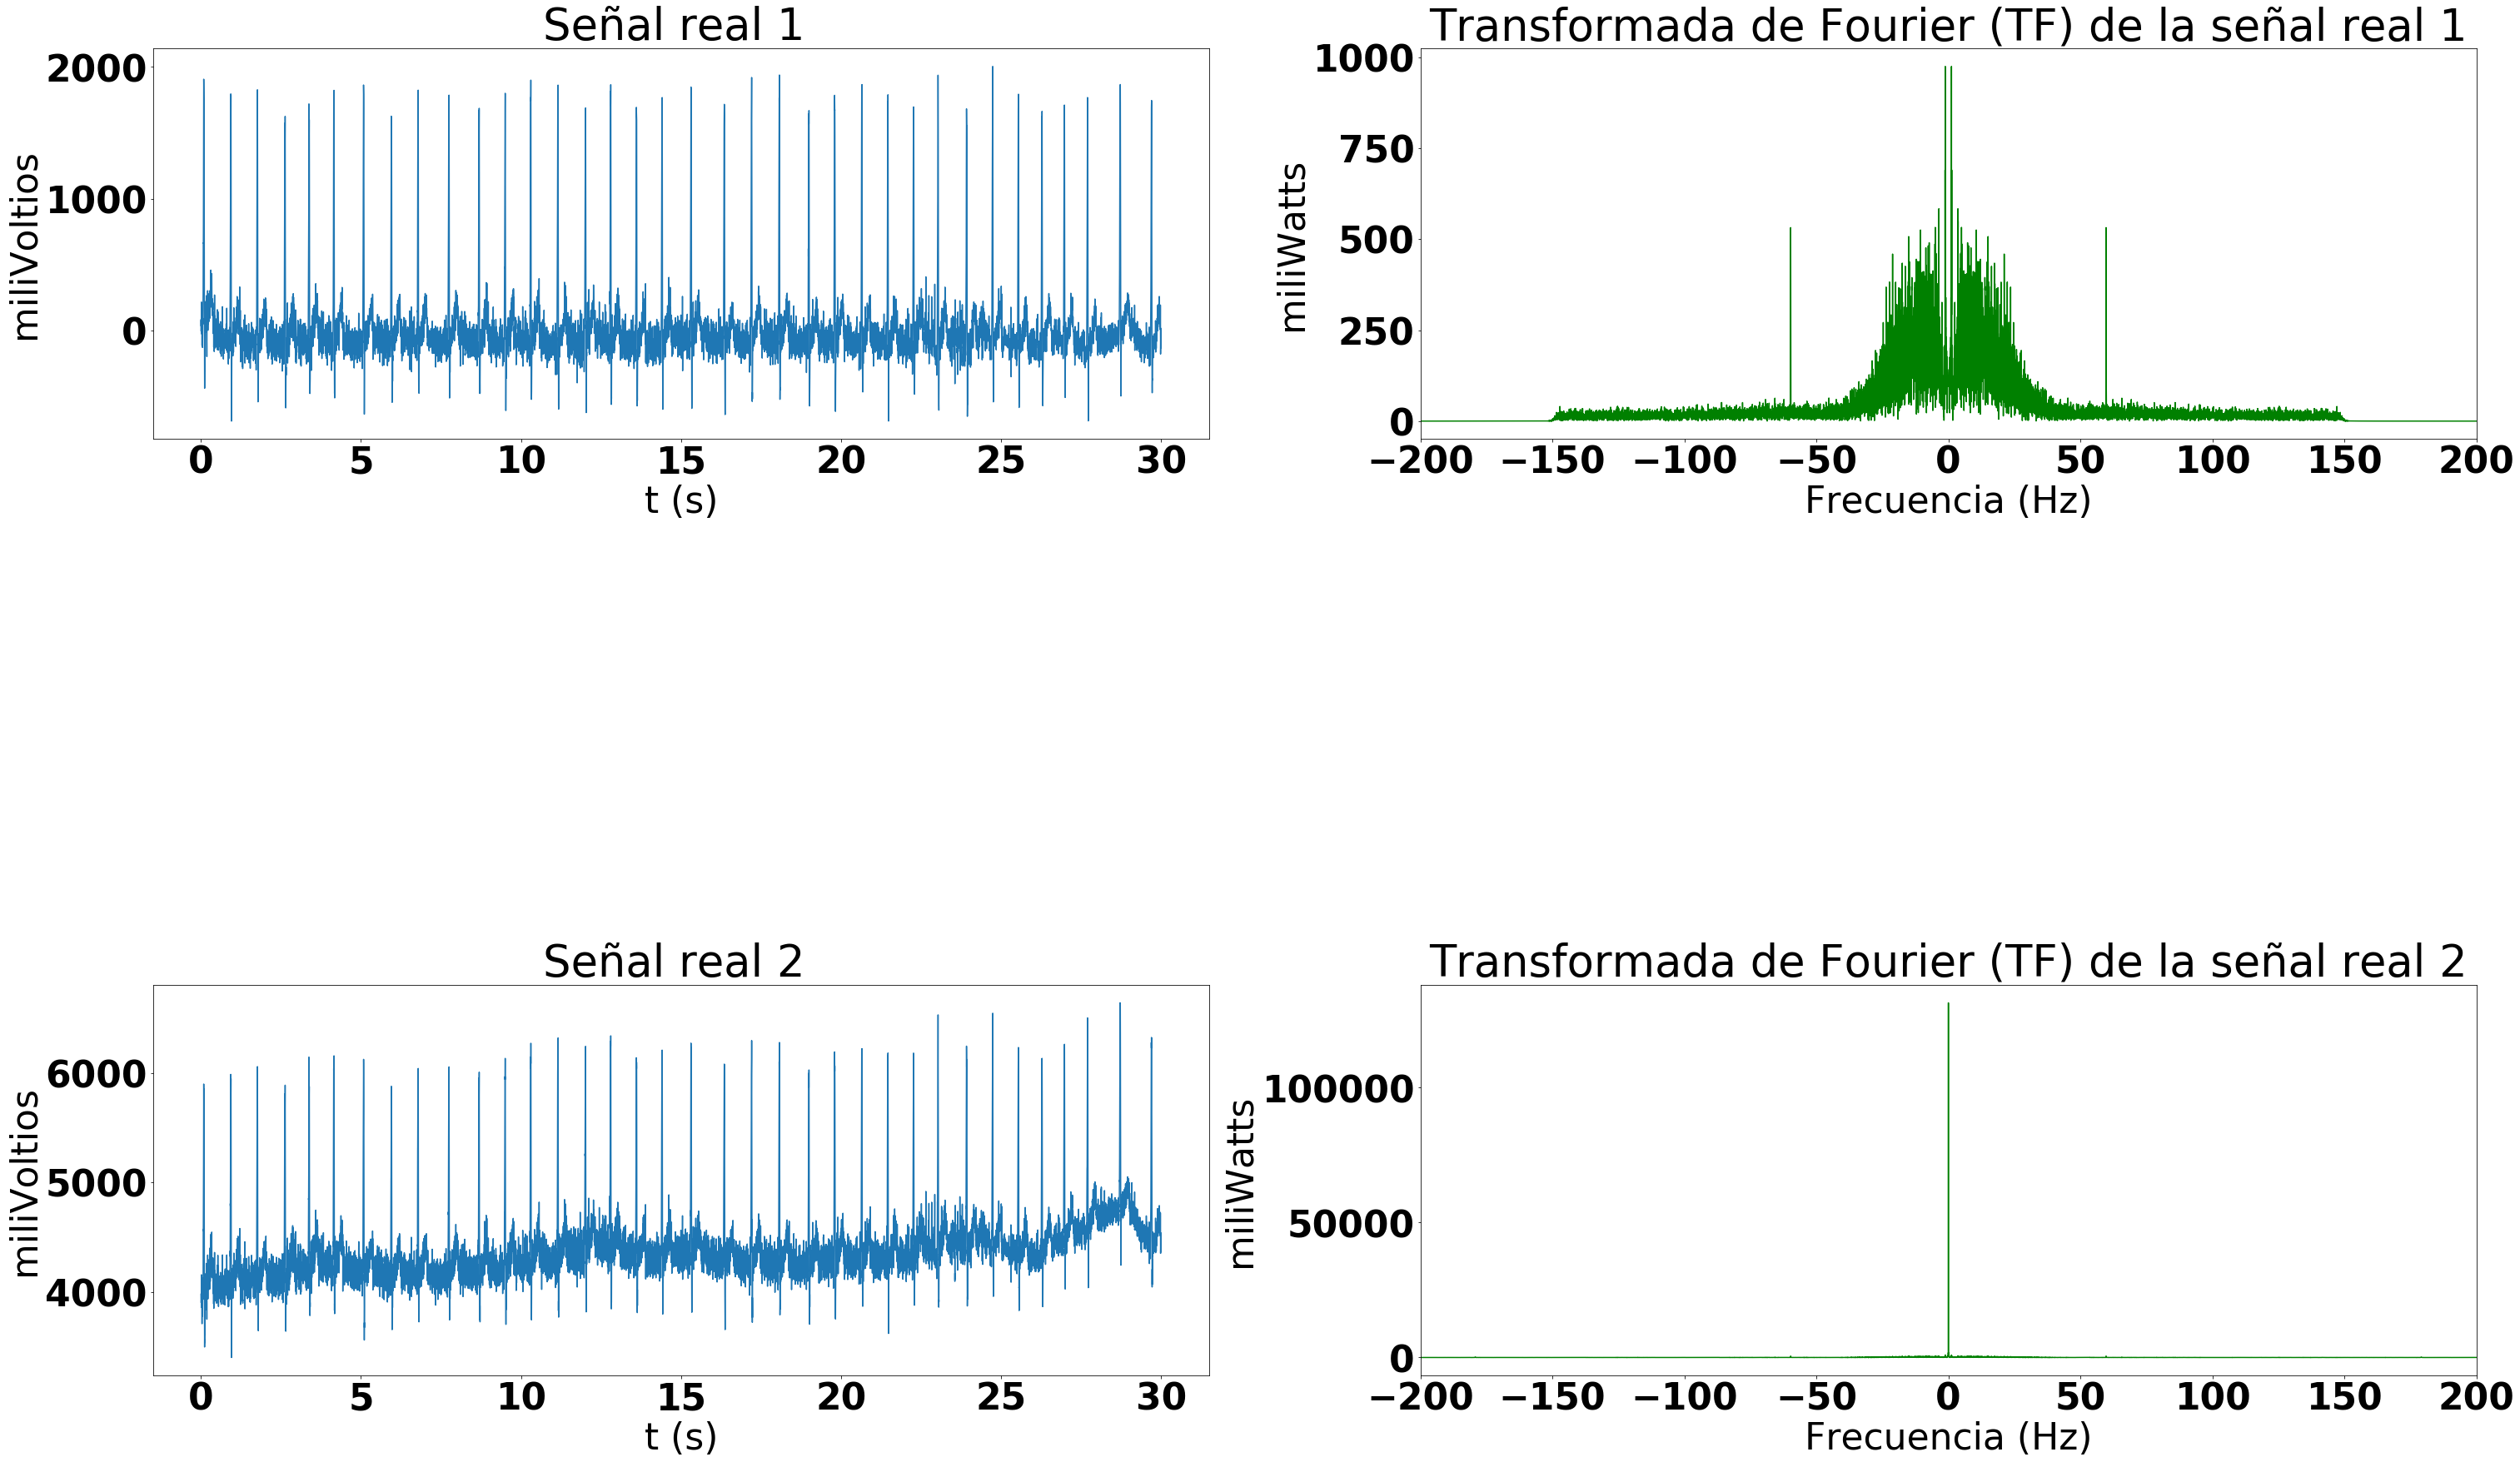

In [41]:
datar1 = np.loadtxt('senal_real_ECG_1.txt')
tamdatar1 = datar1.size
durationr1 = 30
dtr1 = durationr1/tamdatar1
tr1 = np.arange(0,durationr1,dtr1)


print('Número de datos = %.f' % tamdatar1)
print('Duración = %f s'  % durationr1)
print('Muestreo temporal = %f s' % dtr1)

plt.subplot(5,2,1)
plt.plot(tr1,datar1)
plt.title('Señal real 1 ')
plt.ylabel('miliVoltios')
plt.xlabel('t (s)')


#Transformada

dataftr1 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(datar1)))*dtr1
freqr1 = np.arange(-1/(2*dtr1),1/(2*dtr1),1/(dtr1*tr1.size))
#freq = freq[0:freq.size-1]


dataft_phaser1 = np.zeros((dataftr1.size))
for cont in range(0,dataft_phaser1.size):
    dataft_phaser1[cont] = cm.phase(dataftr1[cont])

plt.subplot(5,2,2)
plt.plot(freqr1,abs(dataftr1),color='green')
plt.xlim(-200, 200)
plt.title('Transformada de Fourier (TF) de la señal real 1')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')



#Segunda señal real

datar2 = np.loadtxt('senal_real_ECG_2.txt')
tamdatar2 = datar2.size
durationr2 = 30
dtr2 = durationr2/tamdatar2
tr2 = np.arange(0,durationr2,dtr2)


print('Número de datos = %.f' % tamdatar2)
print('Duración = %f s'  % durationr2)
print('Muestreo temporal = %f s' % dtr2)

plt.subplot(5,2,5)
plt.plot(tr2,datar2)
plt.title('Señal real 2 ')
plt.ylabel('miliVoltios')
plt.xlabel('t (s)')


#Transformada

dataftr2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(datar2)))*dtr2
freqr2 = np.arange(-1/(2*dtr2),1/(2*dtr2),1/(dtr2*tr2.size))
#freq = freq[0:freq.size-1]


dataft_phaser2 = np.zeros((dataftr2.size))
for cont in range(0,dataft_phaser2.size):
    dataft_phaser2[cont] = cm.phase(dataftr2[cont])

plt.subplot(5,2,6)
plt.plot(freqr2,abs(dataftr2),color='green')
plt.xlim(-200, 200)
plt.title('Transformada de Fourier (TF) de la señal real 2')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('miliWatts')










Procedamos a realizar zoom sobre nuestros espectros en el espacio de las frecuencias y eliminar la frecuencia cercana a cero restando el valor promedio de todos los datos a cada uno. 


Para la señal real 1:

El valor promedio en la primera señal real es:  3.1776272995605472


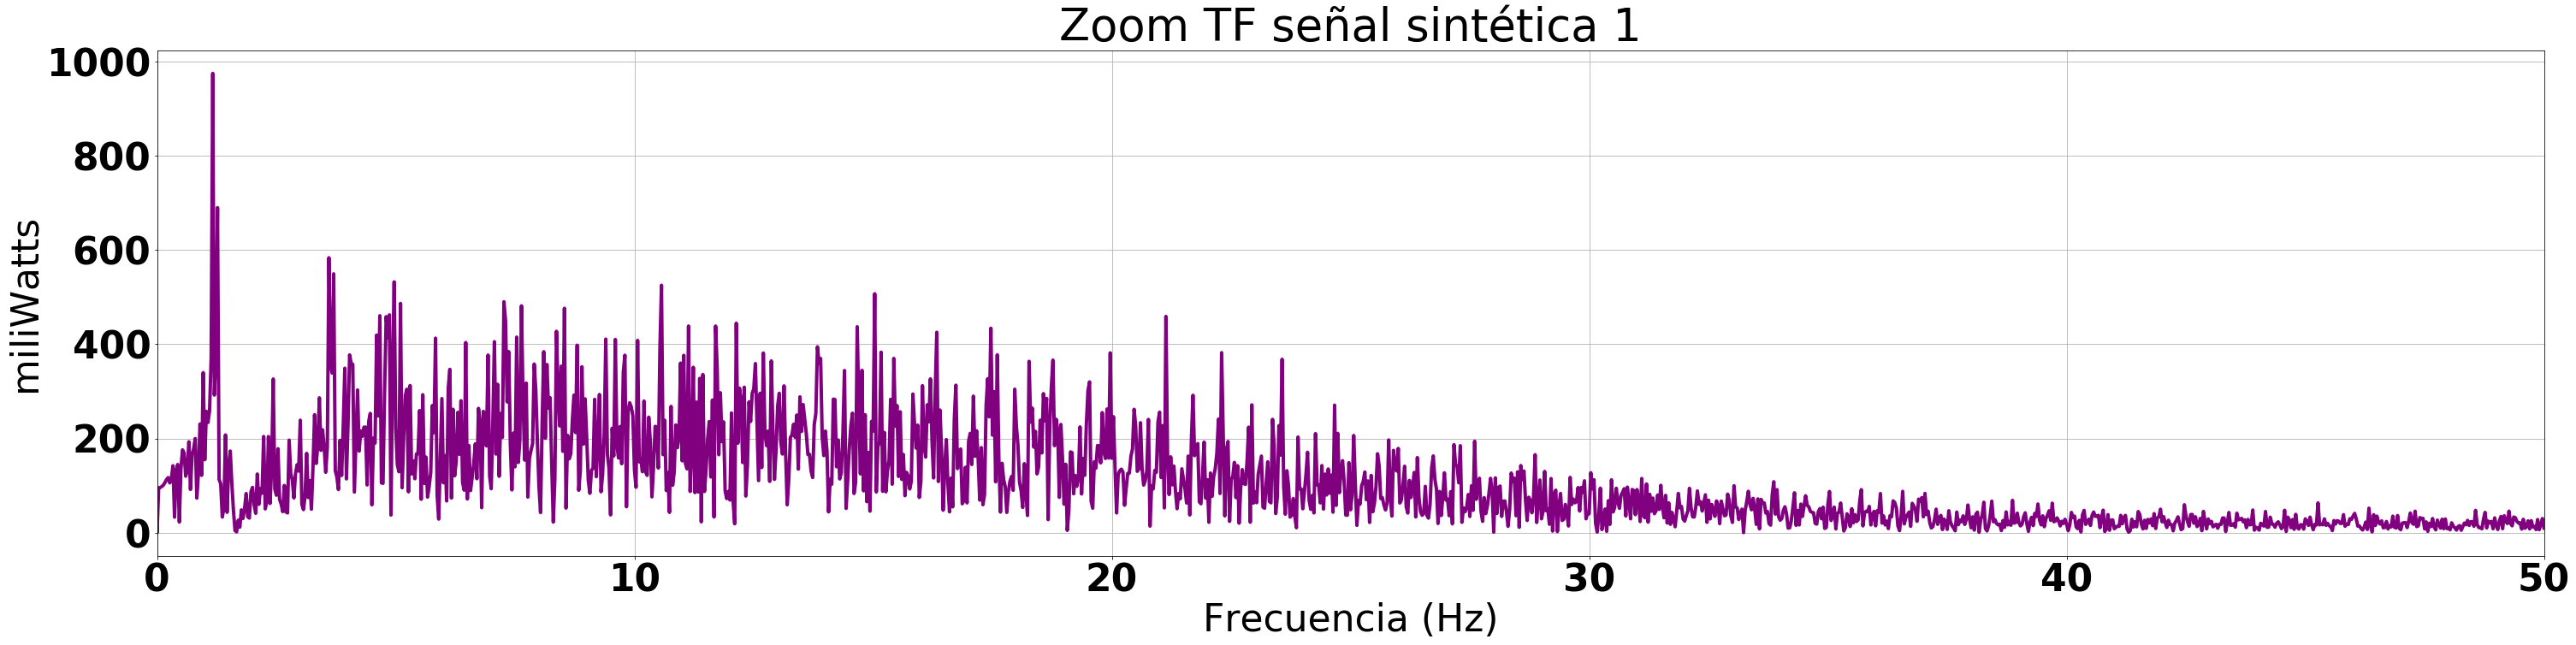

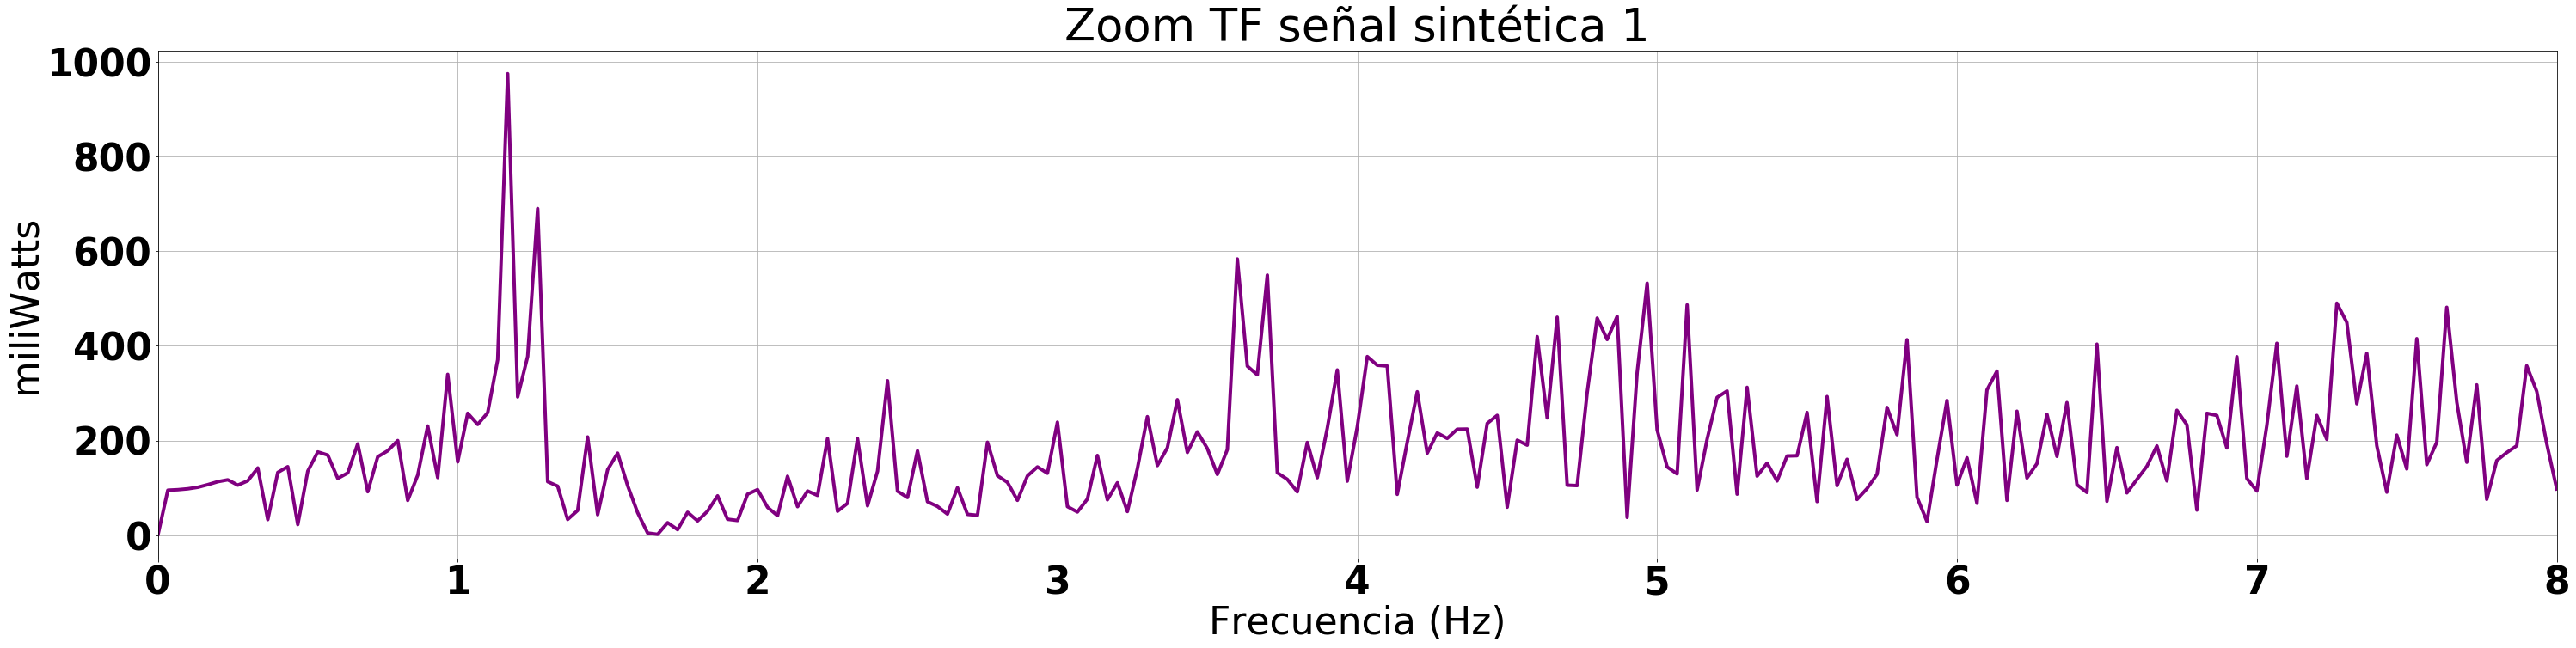

In [33]:
#Transformada
vp1 = np.mean(datar1) #Valor promedio señal original
dataftr1 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(datar1-vp1)))*dtr1
freqr1 = np.arange(-1/(2*dtr1),1/(2*dtr1),1/(dtr1*tr1.size))
#freq = freq[0:freq.size-1]
print("El valor promedio en la primera señal real es: ", vp1 )

dataft_phaser1 = np.zeros((dataftr1.size))
for cont in range(0,dataft_phaser1.size):
    dataft_phaser1[cont] = cm.phase(dataftr1[cont])

plt.subplot(4,1,3)
plt.plot(freqr1,abs(dataftr1),color='purple',linewidth=4)
plt.title('Zoom TF señal sintética 1')
plt.xlim(0, 50)
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()


plt.subplot(4,1,4)
plt.plot(freqr1,abs(dataftr1),color='purple',linewidth=4)
plt.xlim(0, 8)
plt.title('Zoom TF señal sintética 1')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()


Después de realizar las gráficas aumentadas podemos identificar una frecuencia de alrededor de **1.16Hz** para la primera señal real.

Para la señal real 2:

El valor promedio en la segunda señal real es:  4381.171920572917


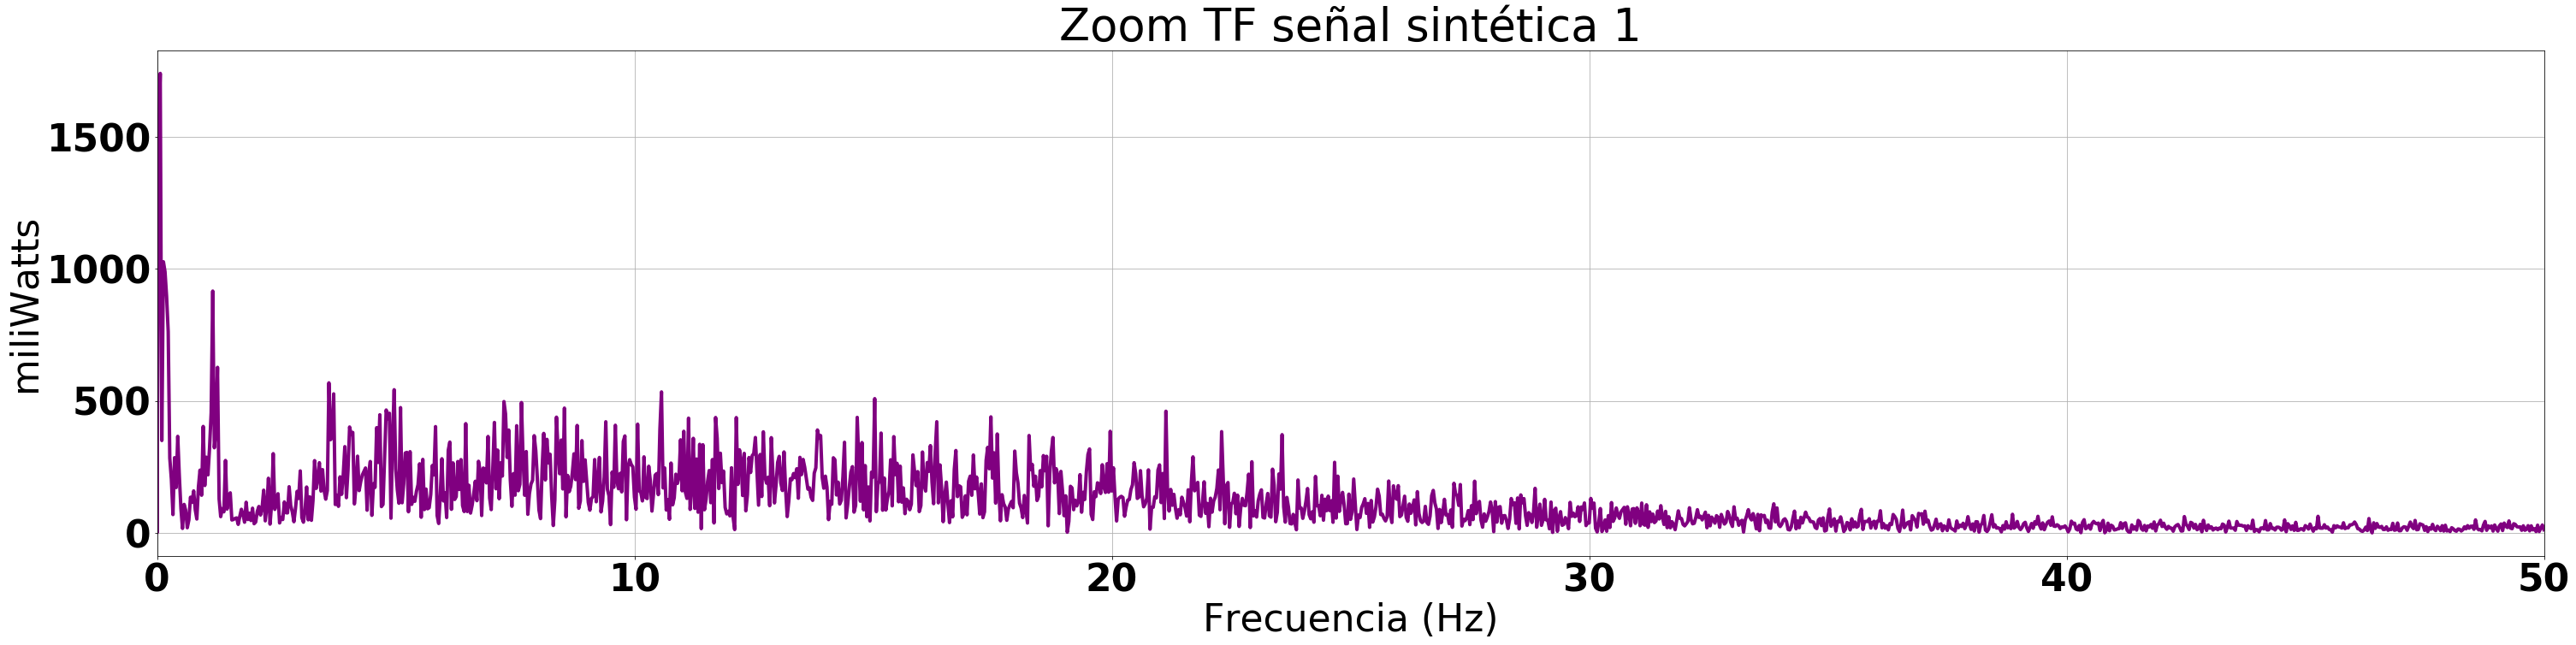

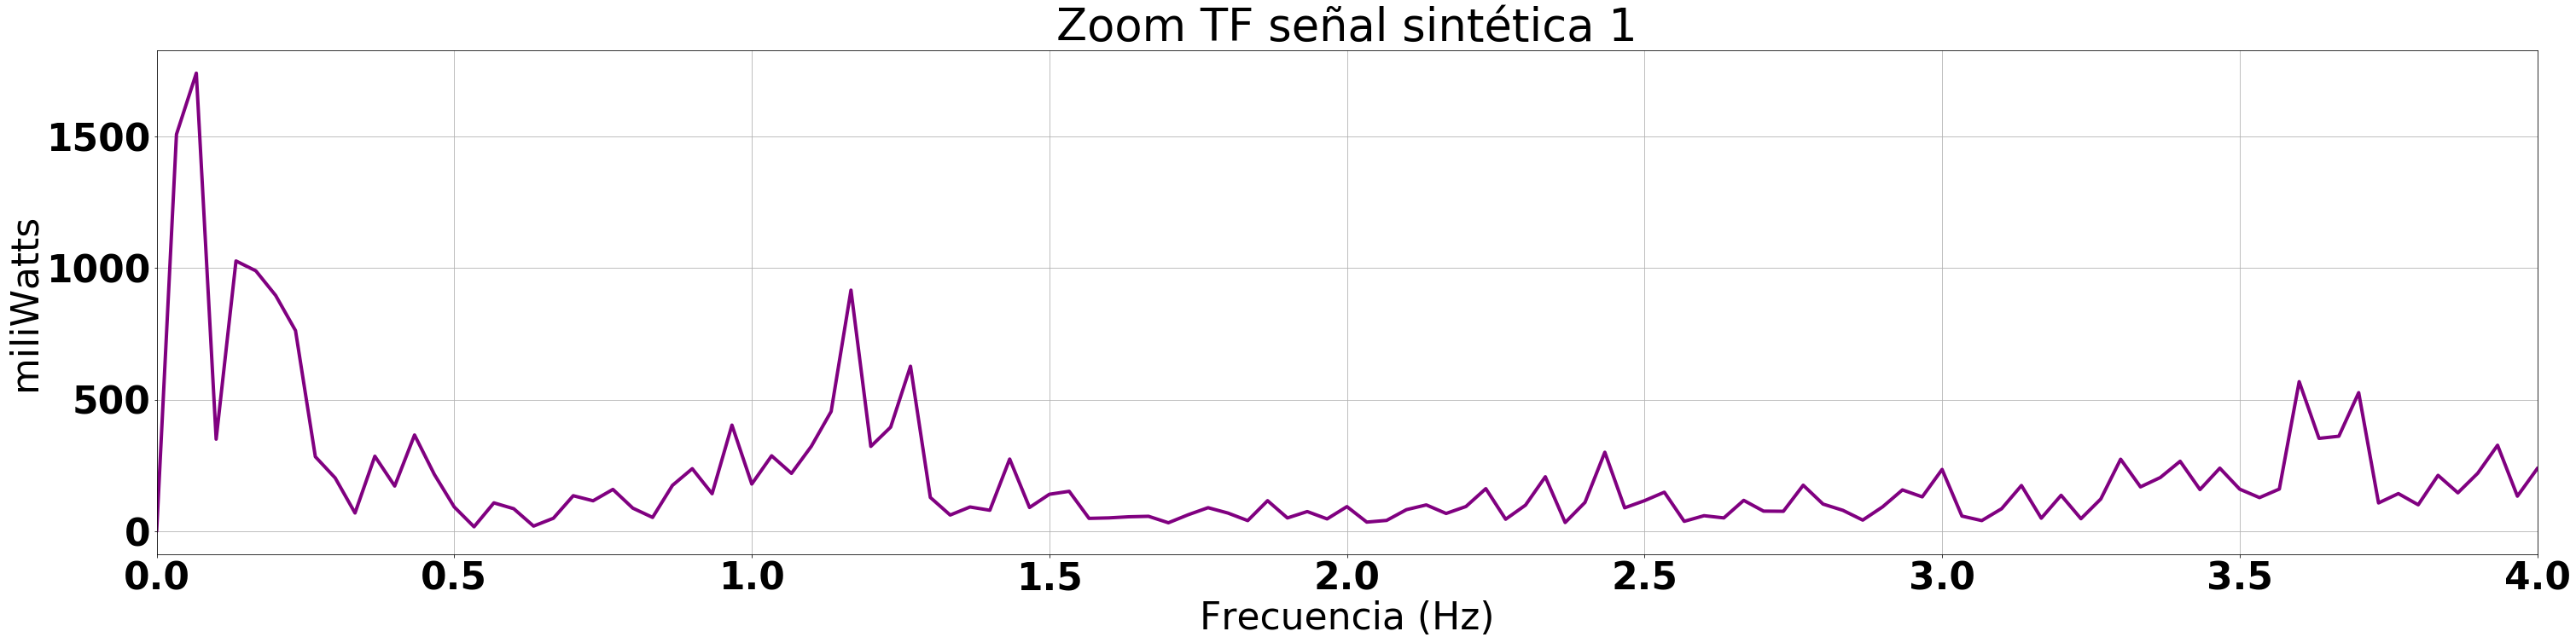

In [36]:
#Transformada
vp = np.mean(datar2)
dataftr2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(datar2-vp)))*dtr2
freqr2 = np.arange(-1/(2*dtr2),1/(2*dtr2),1/(dtr2*tr2.size))
#freq = freq[0:freq.size-1]
print("El valor promedio en la segunda señal real es: ", vp )

dataft_phaser2 = np.zeros((dataftr2.size))
for cont in range(0,dataft_phaser2.size):
    dataft_phaser2[cont] = cm.phase(dataftr2[cont])

plt.subplot(4,1,3)
plt.plot(freqr2,abs(dataftr2),color='purple',linewidth=4)
plt.title('Zoom TF señal sintética 1')
plt.xlim(0, 50)
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()


plt.subplot(4,1,4)
plt.plot(freqr2,abs(dataftr2),color='purple',linewidth=4)
plt.xlim(0, 4)
plt.title('Zoom TF señal sintética 1')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()

Después de realizar las gráficas aumentadas podemos identificar una frecuencia de alrededor de **1.22 Hz** para la segunda señal real.

En ambas gráficas y en especial en el espectro en el espacio de las frecuencias de la segunda señal real, se aprecia como con la eliminación del bias se elimina gran parte del ruido que tiene un peso significativo en la frecuencia cero, proporcionando un  espectro donde es significativamente más fácil identificar la frecuencia fundamental.

**5. Con base en los análisis anteriores, identifique la frecuencia cardíaca y determine si la señal ECG tomada en un paciente real corresponde a un paciente sano o no.**

Para la señal real número uno, el paciente presenta una frecuencia cardiaca de 69.2 pulsaciones por minuto, entre 60 y 80 latidos por minuto, la cual es normal para una persona adulta.
Para la señal real número dos, el paciente presenta una frecuencia cardiaca de 73.2 pulsaciones por minuto, la cual también es normal.

**6. ¿Cuál es la frecuencia cardíaca? ¿De las dos señales reales, puede identificar la que tuvo un tratamiento digital previo? Justifique.**

Para determinar que señal recibió tratamiento previo, vamos a comparar los espectros en el espacio de las frecuencias realizando la eliminación del bias.

Text(0.5, 0, 'Frecuencia (Hz)')

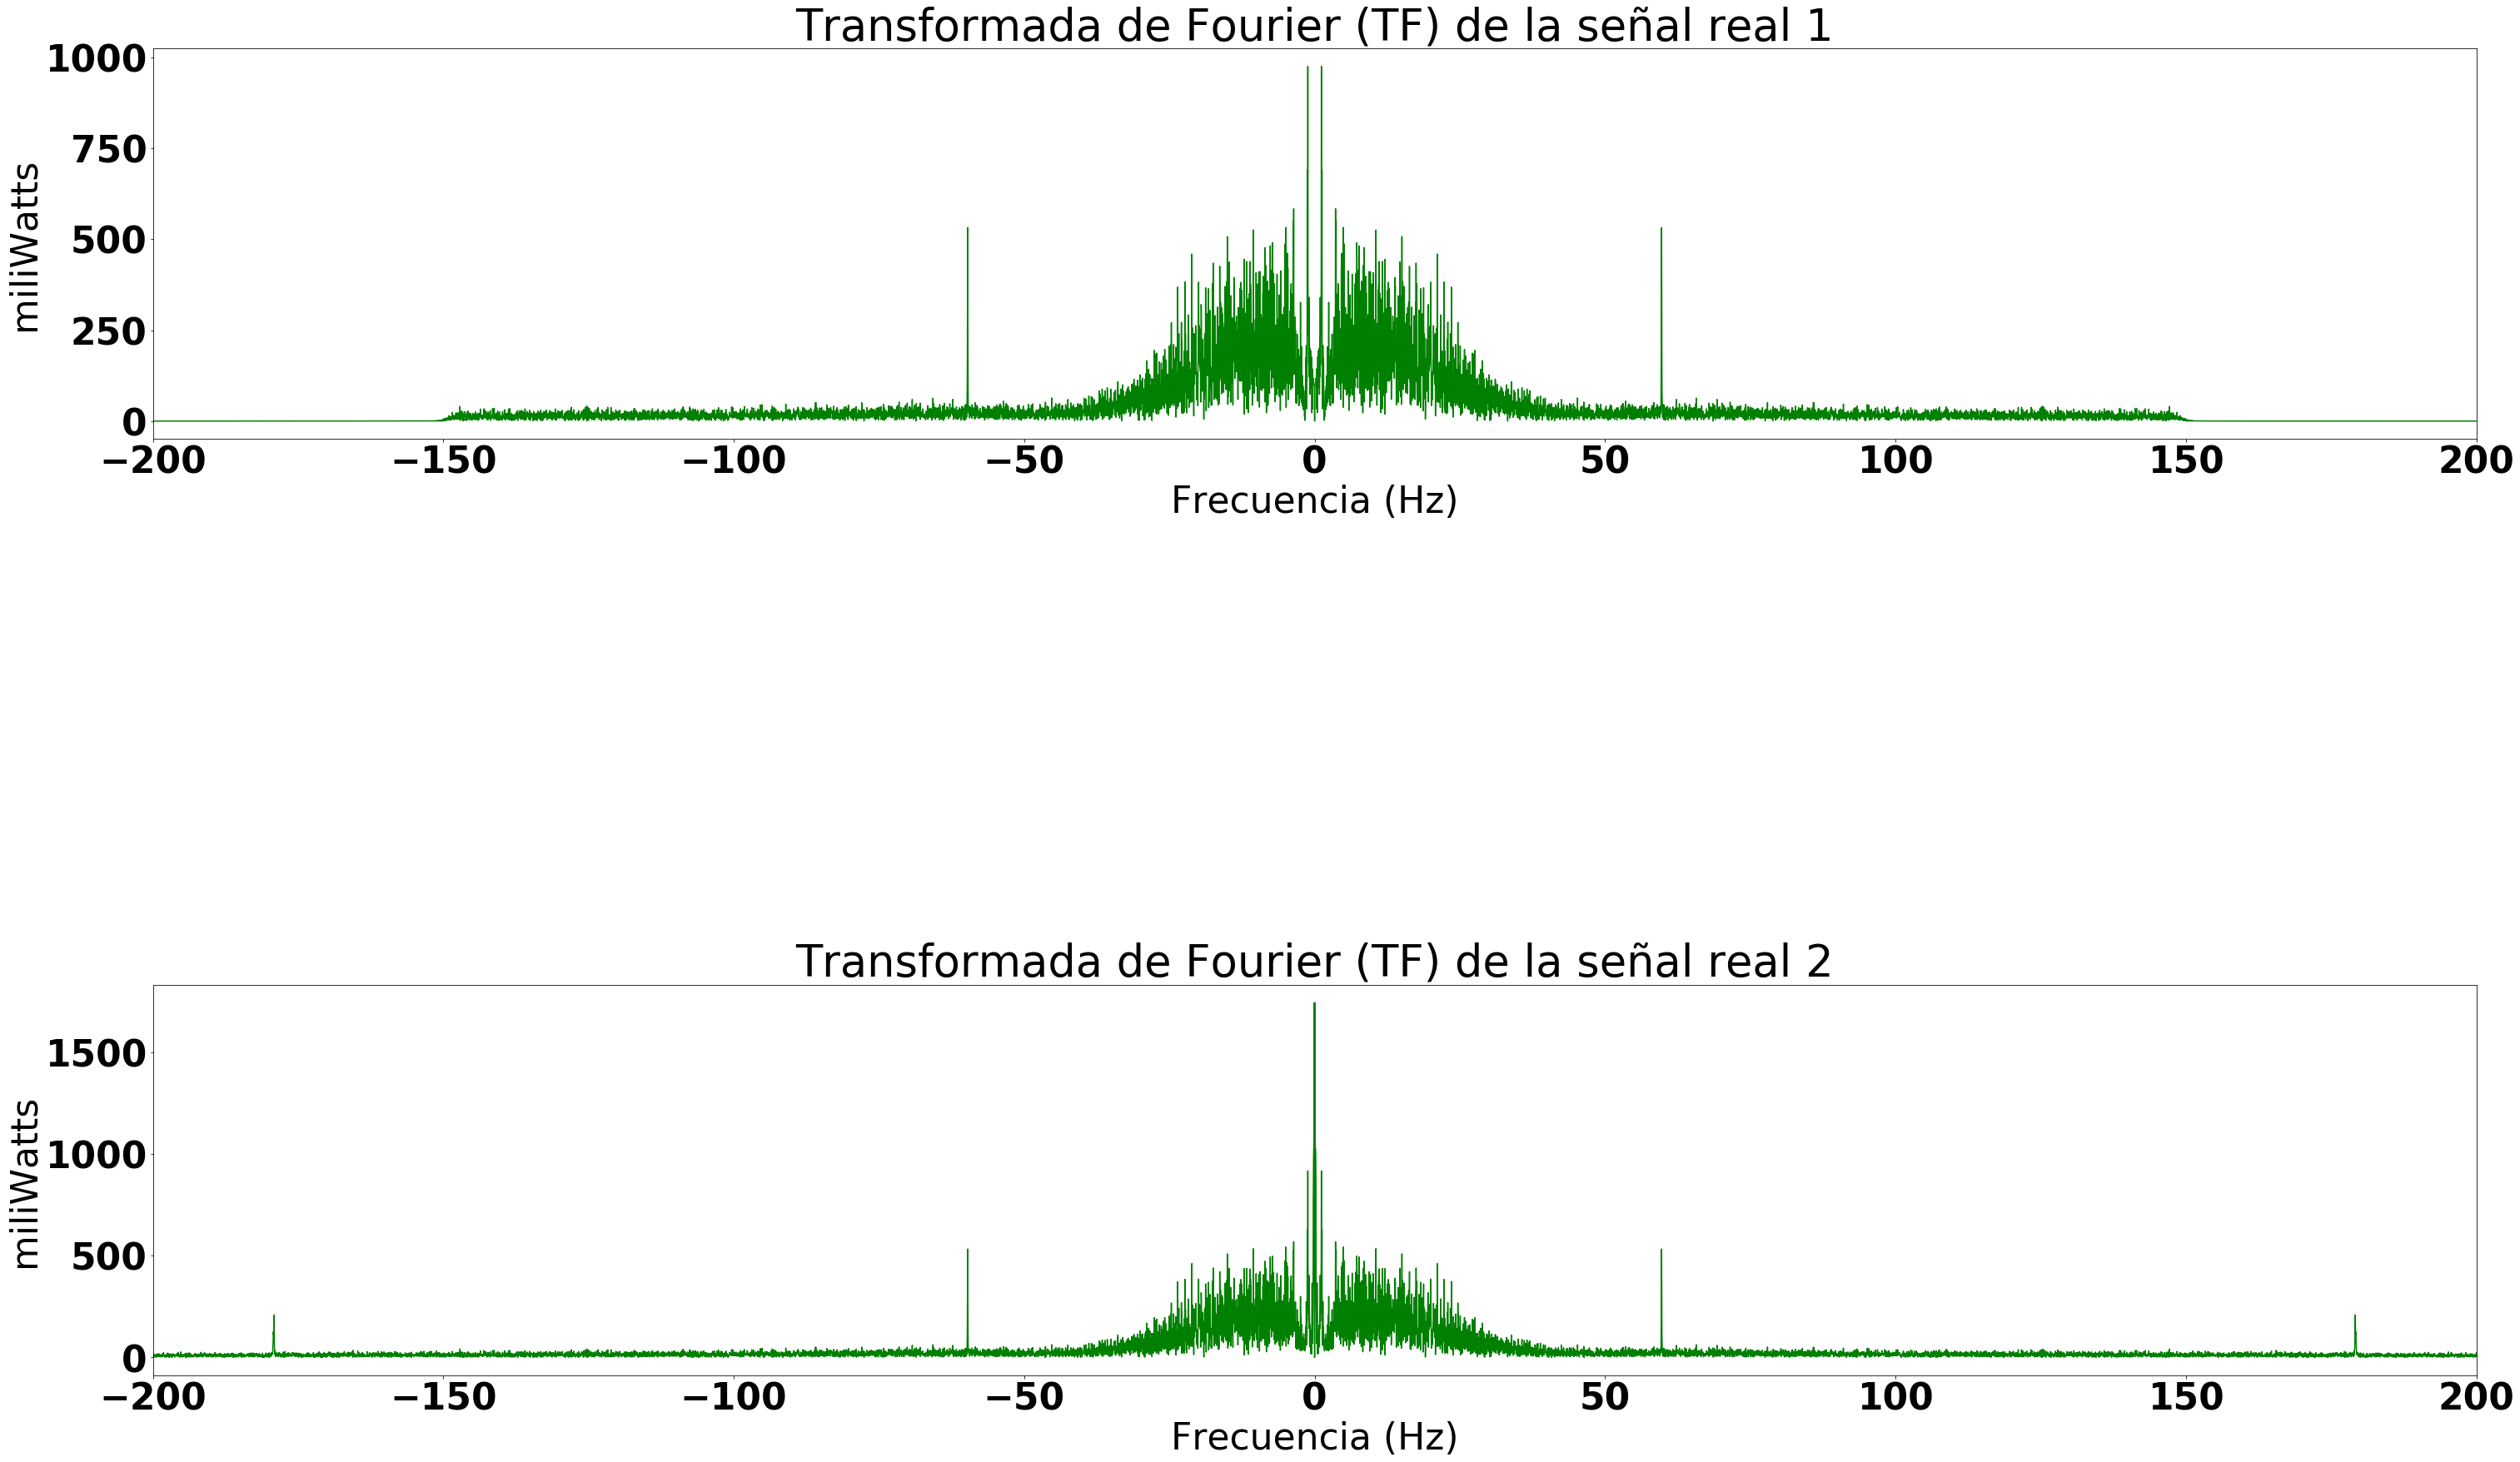

In [40]:
#Transformada

dataftr1 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(datar1-vp1)))*dtr1
freqr1 = np.arange(-1/(2*dtr1),1/(2*dtr1),1/(dtr1*tr1.size))
#freq = freq[0:freq.size-1]


dataft_phaser1 = np.zeros((dataftr1.size))
for cont in range(0,dataft_phaser1.size):
    dataft_phaser1[cont] = cm.phase(dataftr1[cont])

plt.subplot(5,1,3)
plt.plot(freqr1,abs(dataftr1),color='green')
plt.xlim(-200, 200)
plt.title('Transformada de Fourier (TF) de la señal real 1')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')

#Transformada

dataftr2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(datar2-vp)))*dtr2
freqr2 = np.arange(-1/(2*dtr2),1/(2*dtr2),1/(dtr2*tr2.size))
#freq = freq[0:freq.size-1]


dataft_phaser2 = np.zeros((dataftr2.size))
for cont in range(0,dataft_phaser2.size):
    dataft_phaser2[cont] = cm.phase(dataftr2[cont])

plt.subplot(5,1,5)
plt.plot(freqr2,abs(dataftr2),color='green')
plt.xlim(-200, 200)
plt.title('Transformada de Fourier (TF) de la señal real 2')
plt.ylabel('miliWatts')
plt.xlabel('Frecuencia (Hz)')



Al comparar las transformadas observamos que la eliminación del bias para señal real número uno es ideal lo que sugiere que esta tuvo un tratamiento digital previo, La señal real número dos sigue mostrando la frecuencia en cero generada por ruido de manera significativa lo que sugiere que el tratamiento de restar el valor promedio a la señal original no es suficiente.

**REFERENCIAS**

Referencias

[1] https://www.geeksforgeeks.org

[2] https://www.programiz.com/c-programming/bitwise-operators

[3] Bernstein D. History and physical examination. In: Kliegman RM, Stanton BF, St. Geme JW, Schor NF, eds. Nelson Textbook of Pediatrics. 20th ed. Philadelphia, PA: Elsevier; 2016:chap 422.

[4]Simel DL. Approach to the patient: history and physical examination. In: Goldman L, Schafer AI, eds. Goldman-Cecil Medicine. 25th ed. Philadelphia, PA: Elsevier Saunders; 2016:chap 7.

